<a href="https://colab.research.google.com/github/ez945y/sklearn/blob/main/Fruit_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 連接雲端硬碟

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 匯入套件

In [3]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import tensorflow as tf
import pandas as pd
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

## 讀取資料

In [4]:
with open("/content/drive/MyDrive/Fruit_Datasets.csv") as f:
    df_data=pd.read_csv(f)
df_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


## 查看有哪些特徵及其類型

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

## 敘述統計

In [9]:
df_data.describe().T.style.background_gradient(subset=['min','50%', 'max'], cmap='winter')

,count,mean,std,min,25%,50%,75%,max
AREA,898.000000,298295.207127,107245.205337,1987.000000,206948.000000,319833.000000,382573.000000,546063.000000
PERIMETER,898.000000,2057.660953,410.012459,911.828000,1726.091500,2196.345450,2389.716575,2811.997100
MAJOR_AXIS,898.000000,750.811994,144.059326,336.722700,641.068650,791.363400,858.633750,1222.723000
MINOR_AXIS,898.000000,495.872785,114.268917,2.283200,404.684375,495.054850,589.031700,766.453600
ECCENTRICITY,898.000000,0.737468,0.088727,0.344800,0.685625,0.754700,0.802150,1.000000
EQDIASQ,898.000000,604.577938,119.593888,50.298400,513.317075,638.140950,697.930525,833.827900
SOLIDITY,898.000000,0.981840,0.018157,0.836600,0.978825,0.987300,0.991800,0.997400
CONVEX_AREA,898.000000,303845.592428,108815.656947,2257.000000,210022.750000,327207.000000,388804.000000,552598.000000
EXTENT,898.000000,0.736267,0.053745,0.512300,0.705875,0.746950,0.775850,0.856200
ASPECT_RATIO,898.000000,2.131102,17.820778,1.065300,1.373725,1.524150,1.674750,535.525700


## 查看有哪些類別

In [6]:
df_data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

## 類別計數

In [7]:
df_data["Class"].value_counts(normalize =True)

DOKOL     0.227171
SAFAVI    0.221604
ROTANA    0.184855
DEGLET    0.109131
SOGAY     0.104677
IRAQI     0.080178
BERHI     0.072383
Name: Class, dtype: float64

## 視覺化類別

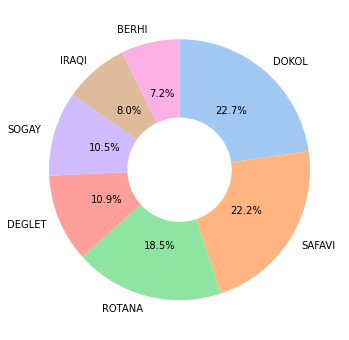

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
Class_counts = df_data["Class"].value_counts()
colors = sns.color_palette('pastel')
fig, axis = plt.subplots(figsize=(8, 6))
fig = plt.pie(Class_counts, labels = Class_counts.index, autopct="%1.1f%%", startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6}, colors =colors)

plt.show()

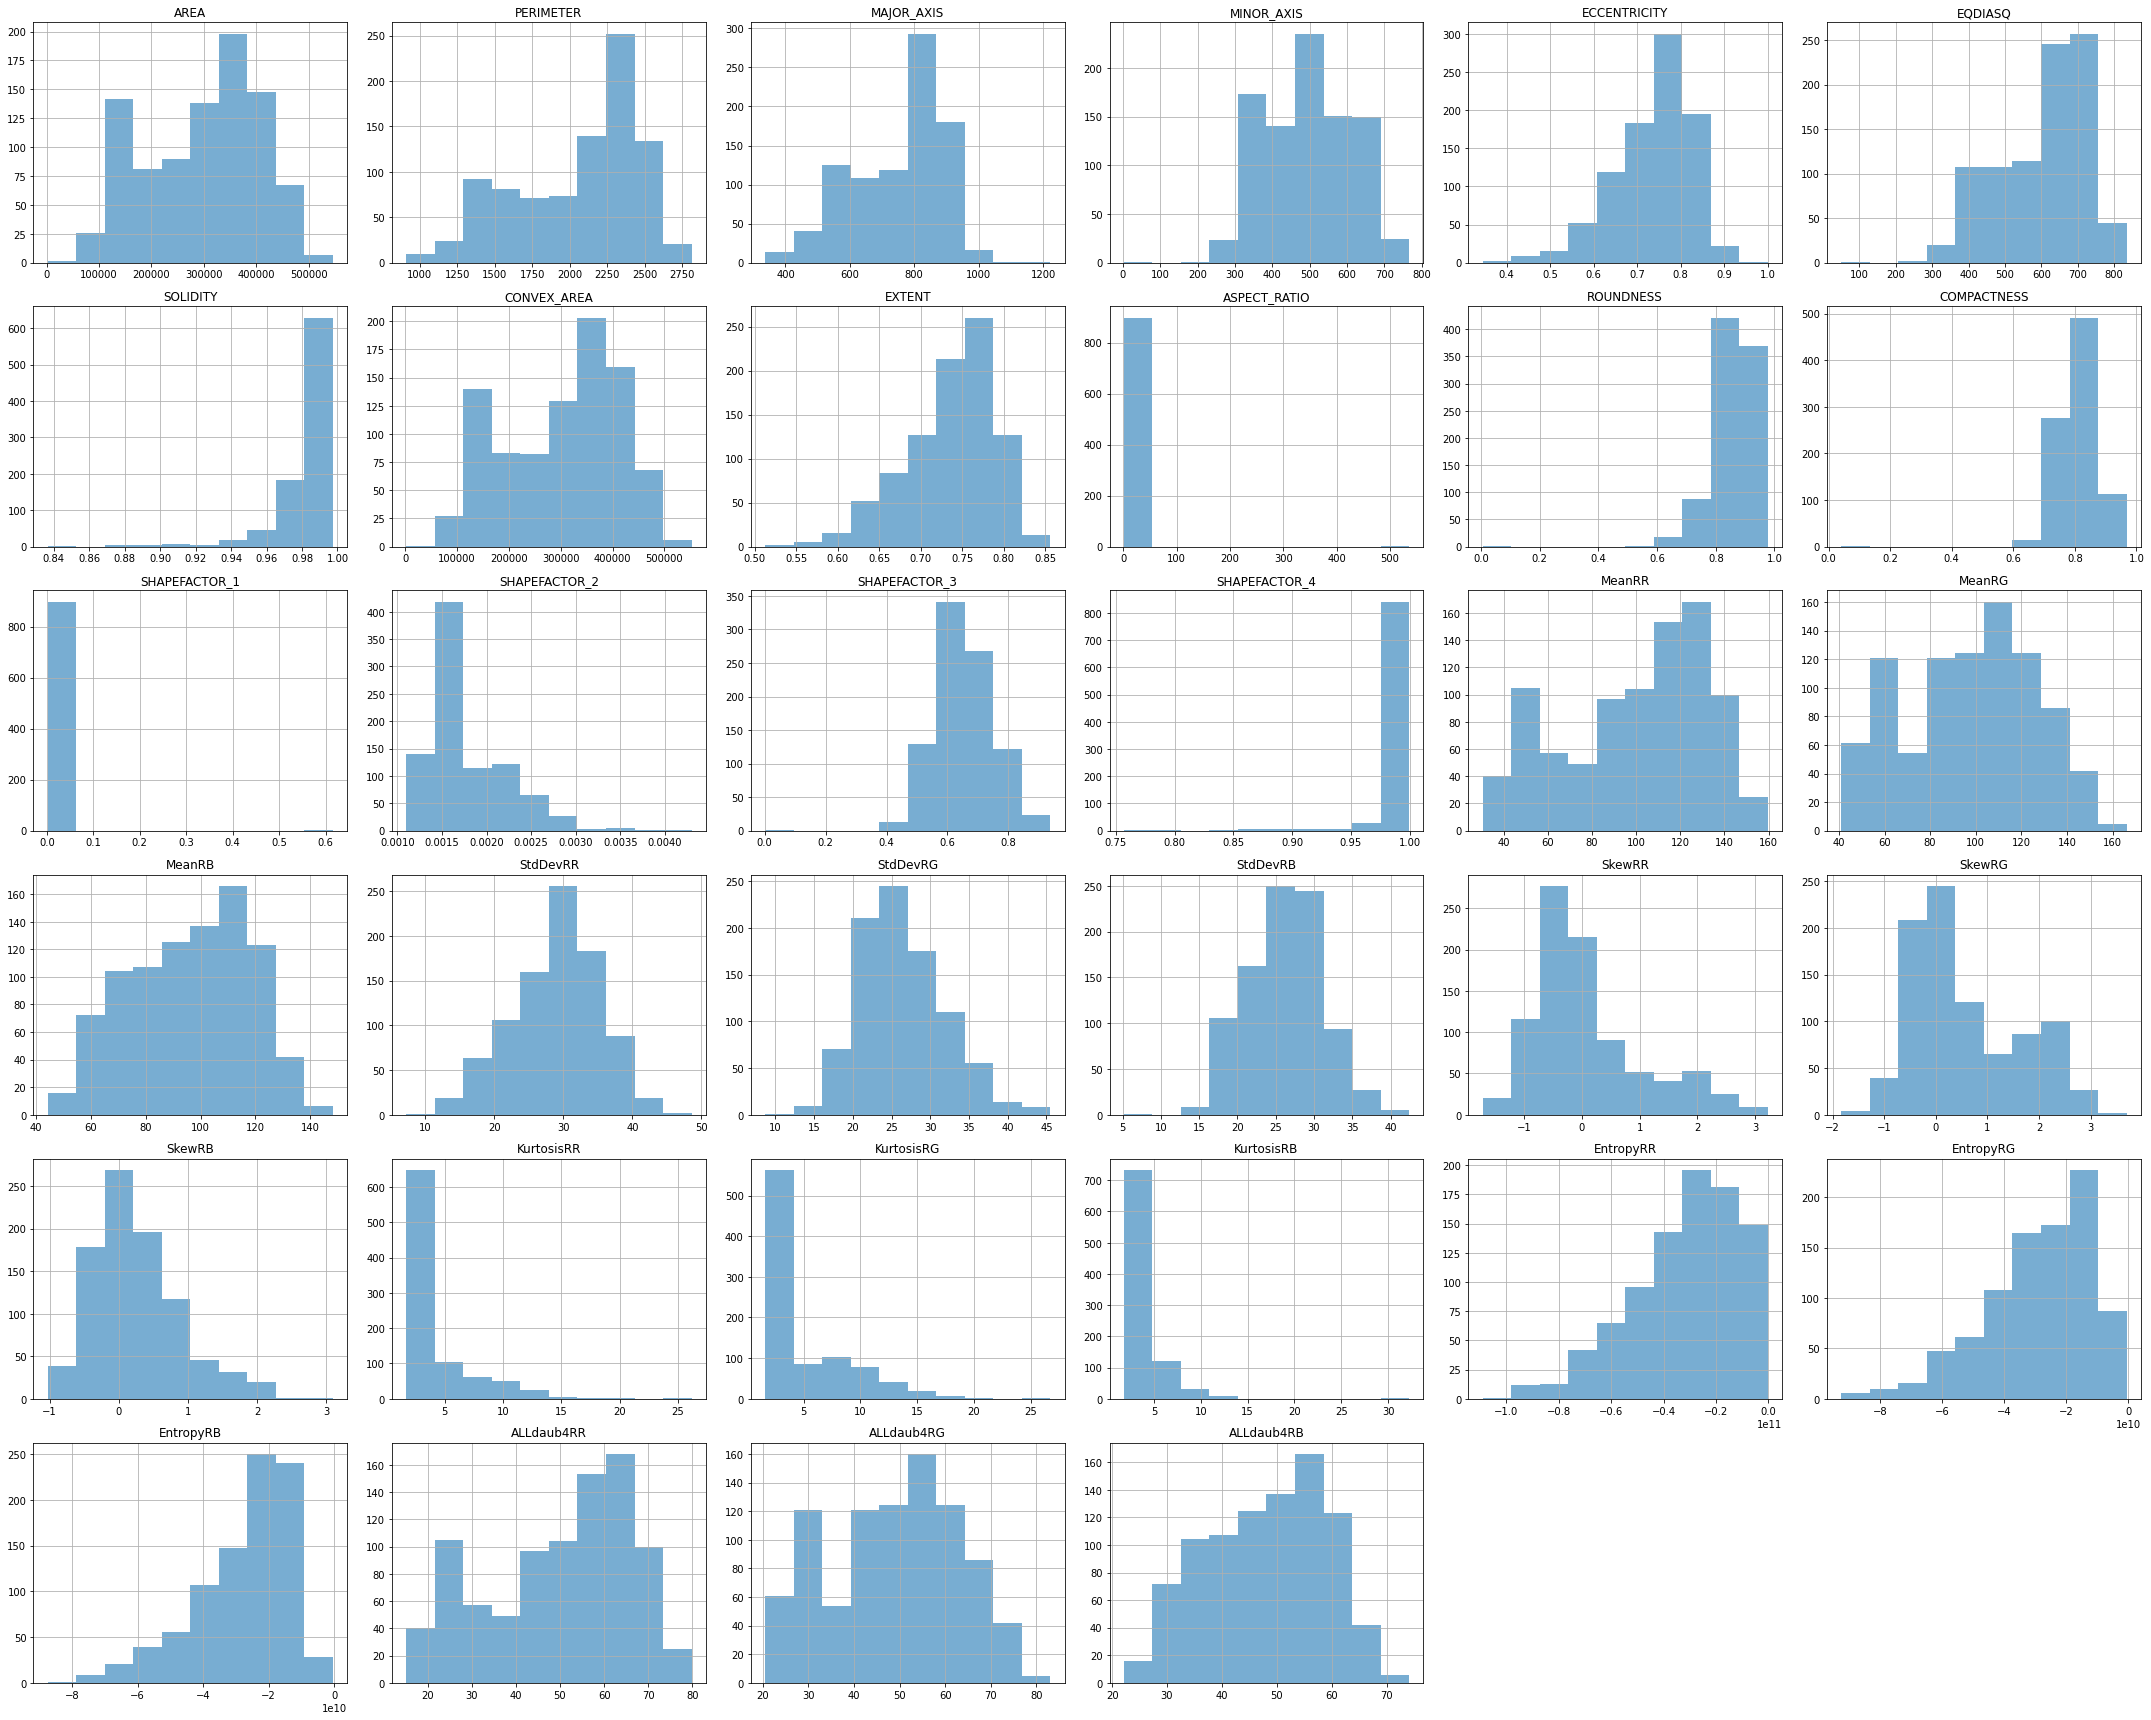

In [11]:
df_data.hist(alpha=0.6, figsize=(30,24))
plt.tight_layout()
plt.show()

## 查看以Class分群的AREA的平均數

In [52]:
means = df_data.groupby('Class')['AREA'].mean()
means

Class
BERHI     405213.446154
DEGLET    233743.357143
DOKOL     145147.421569
IRAQI     433983.583333
ROTANA    387115.867470
SAFAVI    334367.783920
SOGAY     286872.957447
Name: AREA, dtype: float64

## 查看以Class分群的AREA的平均數相形圖

(-0.5, 6.5, 0.0, 600000.0)

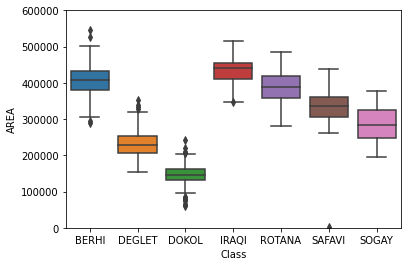

In [46]:
#scatter plot totalbsmtsf/saleprice
cols = df_data[:-1].columns
var = cols[0]
data = pd.concat([df_data['Class'], df_data[var]], axis=1)
fig = sns.boxplot(x='Class', y=var, data=data)
fig.axis(ymin=0, ymax=600000)

## 查看以Class分群的AREA的平均數直條圖

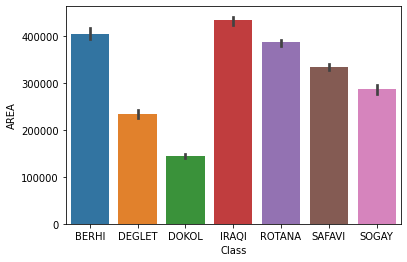

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(x=df_data['Class'], y=df_data['AREA']);

## 相關係數矩陣

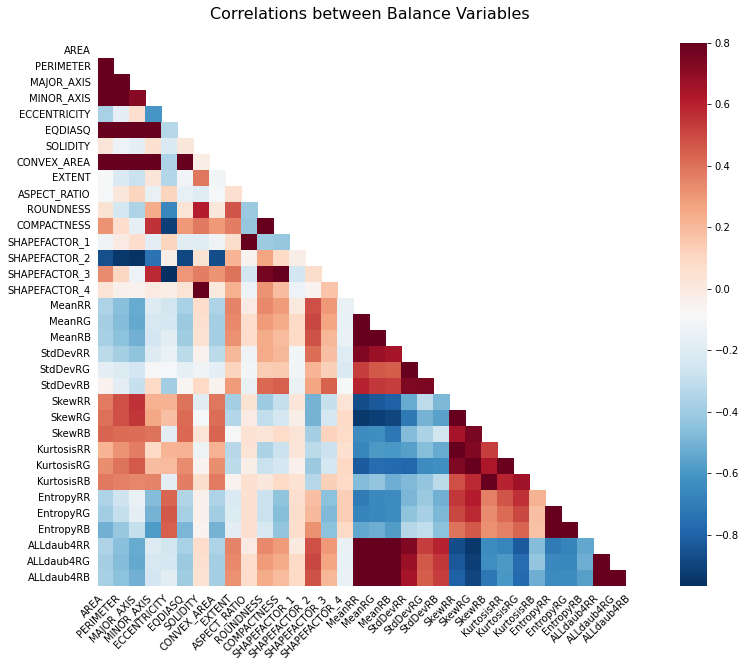

In [ ]:
corrmat = df_data.corr()
mask=np.triu(np.ones_like(corrmat, dtype=bool))
corr1=corrmat.copy()
fig, ax = plt.subplots(figsize=(14,10))   
sns.heatmap(mask=mask, data=corr1, vmax=.8, square=True, cmap="RdBu_r", annot_kws={'fontsize':10,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations between Balance Variables\n', fontsize=16)
fig.show()

## KDE矩形圖

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


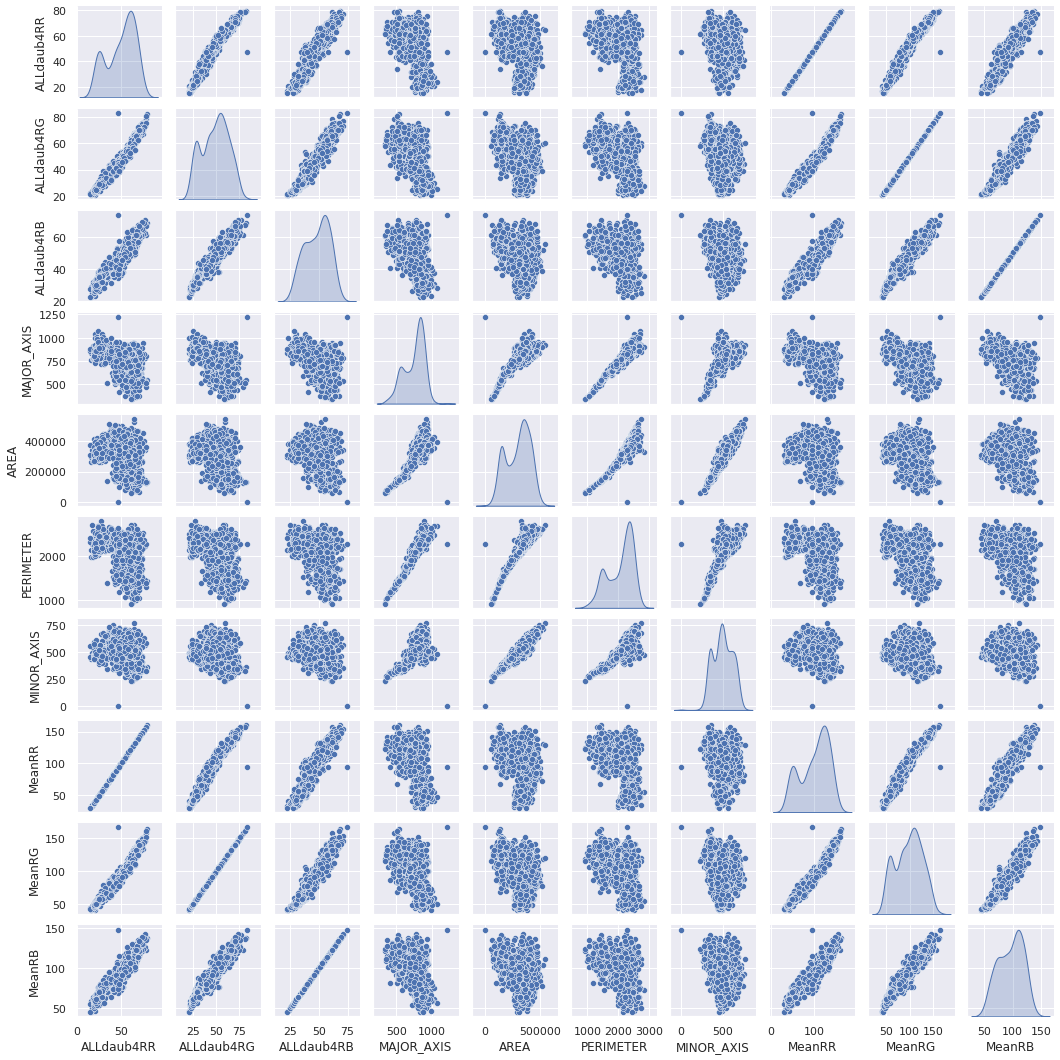

In [15]:
sns.set()
cols = ['ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'MAJOR_AXIS', 'AREA', 'PERIMETER', 'MINOR_AXIS','MeanRR','MeanRG','MeanRB']
sns.pairplot(df_data[cols], size = 1.5, diag_kind="kde",palette="husl")
plt.show()

## 標準化函式

In [11]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df_input):
    sc = StandardScaler()   
    df=sc.fit_transform(df_input)
    return df

In [13]:
X = data_preprocessing(df_data.drop("Class",axis =1))
X.shape

(898, 34)

## 將類別轉成標籤

In [17]:
label = LabelEncoder()

y = df_data['Class']
y = label.fit_transform(y)

## 切割訓練集和測試集

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022, shuffle=True)
# shape of the dataset
print('Shape of training data :',x_train.shape)
print('Shape of testing data :',x_test.shape)

Shape of training data : (601, 34)
Shape of testing data : (297, 34)


## 建立模型

In [22]:
model = xgb.XGBClassifier(
                        random_state=2022,
                        learning_rate=0.01,
                        booster='gbtree',
                        nthread=2,
                        eval_metric='mlogloss',
                        verbosity=1
                        )

## 訓練資料

In [24]:
start = time.time() # Time before training

# Fit the model with the training data
model.fit(x_train, y_train)

end = time.time() # Time after training

# Compute how much time the model need to train
print(f'Training took {round(end-start,2)} seconds to be completed!')

Training took 4.41 seconds to be completed!


## 預測資料

In [33]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

## Accuracy分數

In [37]:
model.score(x_train , y_train), model.score(x_test , y_test)

(0.9500831946755408, 0.9057239057239057)

## F1分數

In [38]:
recall_score = round(recall_score(y_test,predict_test,average='macro'), 2)
f1_score = round(f1_score(y_test,predict_test,average='macro'), 2)
print(f'The accuracy in the test set was {round(model.score(x_test , y_test), 2)}, the recall was {recall_score} and the f1 score was {f1_score}')

The accuracy in the test set was 0.91, the recall was 0.87 and the f1 score was 0.87


## 混淆矩陣

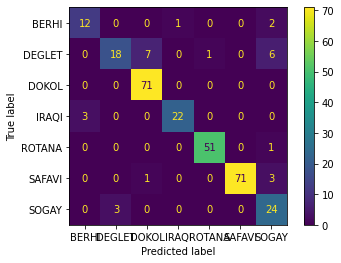

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict_test, labels=[0,1,2,3,4,5,6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["BERHI","DEGLET","DOKOL", "IRAQI","ROTANA","SAFAVI", "SOGAY"])
disp.plot()

## 分類報表

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.86      0.56      0.68        32
           2       0.90      1.00      0.95        71
           3       0.96      0.88      0.92        25
           4       0.98      0.98      0.98        52
           5       1.00      0.95      0.97        75
           6       0.67      0.89      0.76        27

    accuracy                           0.91       297
   macro avg       0.88      0.87      0.87       297
weighted avg       0.91      0.91      0.90       297

